In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from koala.pointsets import uniform
from koala import graph_utils as gu
from koala import plotting as pl
from koala.voronization import generate_lattice
from koala.graph_color import color_lattice
from koala.flux_finder import fluxes_from_ujk, ujk_from_fluxes
from koala.lattice import Lattice
from scipy import linalg as la
from pfapack.pfaffian import pfaffian
from copy import copy
from koala.lattice import INVALID
from koala import example_graphs as eg
from dimer_models.koala_plantri import plantri_to_koala, plantri_generator, read_plantri
from dimer_models.lattice_generation import (
    bipartite_squarefull,
    reduce_bipartite,
)
from tqdm import tqdm

import matplotlib as mpl
from collections import Counter

from dimer_models.kasteleyn import find_kasteleyn_number

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pickle

In [63]:
from os import listdir
from os.path import isfile, join

open_bc = False
mypath = "monomer_results/square_removing"
filenames = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])

filenames = [u for u in filenames if str(open_bc) in u]
filenames[-1]

'02000_bcFalse.pkl'

In [ ]:
with open(f"{mypath}/{filenames[-1]}", "rb") as f:
    res = pickle.load(f)

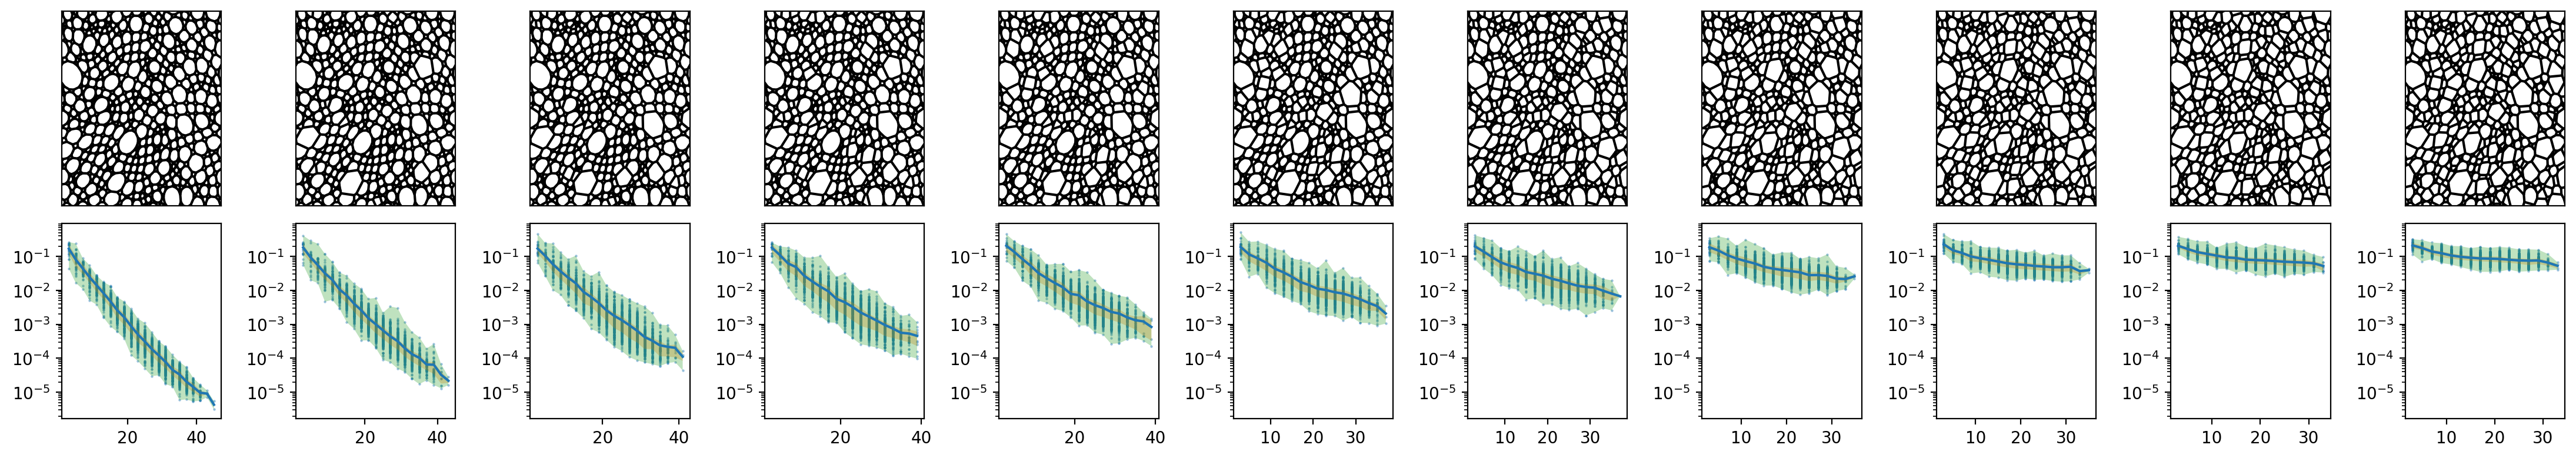

In [ ]:
fig, ax = plt.subplots(2, len(res), figsize=np.array([len(res), 2]) * 2, dpi=200)

for j, r in enumerate(res):
    lat = r["lattice"]
    n_sq = r["n_squares"]
    partition = r["partition_func"]
    distances = r["distances"]
    mags = r["mags"]
    pows = r["powers"]
    dim_probs = r["dimer_probs"]

    # plot_lattice
    ax[0, j].set_xticks([])
    ax[0, j].set_yticks([])
    a_plot = ax[1, j]
    pl.plot_edges(lat, ax=ax[0, j])

    probability = (mags / partition[0]) * 10 ** (pows - partition[1])
    dist_unique = np.unique(distances)
    mean = np.array([np.mean(probability[distances == x]) for x in dist_unique])
    upper_quart = np.array(
        [np.percentile(probability[distances == x], 25) for x in dist_unique]
    )
    lower_quart = np.array(
        [np.percentile(probability[distances == x], 75) for x in dist_unique]
    )
    upper_lim = np.array([np.max(probability[distances == x]) for x in dist_unique])
    lower_lim = np.array([np.min(probability[distances == x]) for x in dist_unique])

    a_plot.scatter(distances, probability, alpha=0.4, s=0.4)

    a_plot.plot(dist_unique, mean)
    a_plot.fill_between(dist_unique, lower_quart, upper_quart, alpha=0.3)
    a_plot.fill_between(dist_unique, lower_lim, upper_lim, alpha=0.3)
    a_plot.sharey(ax[1, 0])
    a_plot.set_aspect("auto")
    a_plot.set_yscale("log")
    # a_plot.set_xscale('log')
plt.tight_layout()
plt.savefig("reducing_squares.pdf")